# Flight Price

# Question 1: Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [16]:
import pandas as pd
df_flight = pd.read_excel('flight_price.xlsx')

In [17]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
rows=len(df_flight.axes[0])
columns = len(df_flight.columns)

In [19]:
print(f'No. of rows in the flight dataset =  {rows}')
print(f'No. of rows in the flight dataset =  {columns}')

No. of rows in the flight dataset =  10683
No. of rows in the flight dataset =  11


# Question 2 : What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution

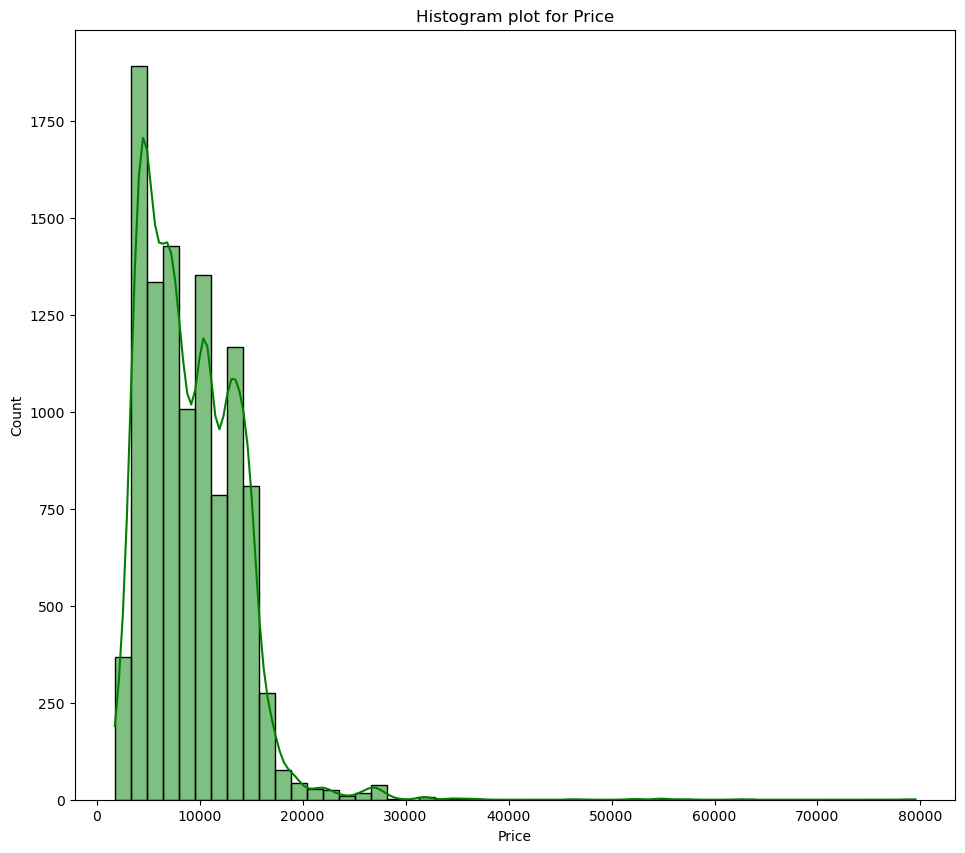

In [20]:
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.subplot(121)
sns.histplot(data=df_flight, x='Price',bins=50,kde=True, color='g')
plt.title('Histogram plot for Price')
plt.show()

#### Price is right skewed

# Question 3 : What is the range of prices in the dataset? What is the minimum and maximum price?

In [21]:
# Calulate min and Max of price

min_price = df_flight['Price'].min()
max_price = df_flight['Price'].max()

print(f'Minimum price = {min_price}')
print(f'Maximum price = {max_price}')

Minimum price = 1759
Maximum price = 79512


In [22]:
# Range of prices
print(f'Range of prices = {max_price-min_price}')

Range of prices = 77753


# Question 4 : How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines

In [23]:
df_flight.groupby(by='Airline').describe()

Price                              \
                                    count          mean           std   
Airline                                                                 
Air Asia                            319.0   5590.260188   2027.362290   
Air India                          1752.0   9611.210616   3900.952942   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2053.0   5673.682903   2264.142168   
Jet Airways                        3849.0  11643.923357   4258.940578   
Jet Airways Business                  6.0  58358.666667  11667.596748   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
SpiceJet                            818.0   4338.284841   1849.922514   
Trujet                                1.0   4140.000000           NaN   
Vistara                             479.0   7796.348643   2914.298578   
Vistara Premium economy               3.0   8962.333333   2915.405518   

                                                                        \
                                       min      25%      50%       75%   
Airline                                                                  
Air Asia                            3383.0   4282.0   5162.0   6451.00   
Air India                           2050.0   6896.0   9443.0  12219.00   
GoAir                               3398.0   3898.0   5135.0   6811.25   
IndiGo                              2227.0   4226.0   5000.0   6494.00   
Jet Airways                         1840.0   9134.0  11467.0  14151.00   
Jet Airways Business               46490.0  52243.0  54747.0  61122.50   
Multiple carriers                   5797.0   7723.0  10197.0  13587.00   
Multiple carriers Premium economy   9845.0  10161.0  11269.0  11269.00   
SpiceJet                            1759.0   3574.5   3873.0   4760.00   
Trujet                              4140.0   4140.0   4140.0   4140.00   
Vistara                             3687.0   5403.0   7980.0   9345.00   
Vistara Premium economy             5969.0   7547.0   9125.0  10459.00   

                                            
                                       max  
Airline                                     
Air Asia                           13774.0  
Air India                          31945.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Jet Airways                        54826.0  
Jet Airways Business               79512.0  
Multiple carriers                  36983.0  
Multiple carriers Premium economy  14629.0  
SpiceJet                           23267.0  
Trujet                              4140.0  
Vistara                            21730.0  
Vistara Premium economy            11793.0

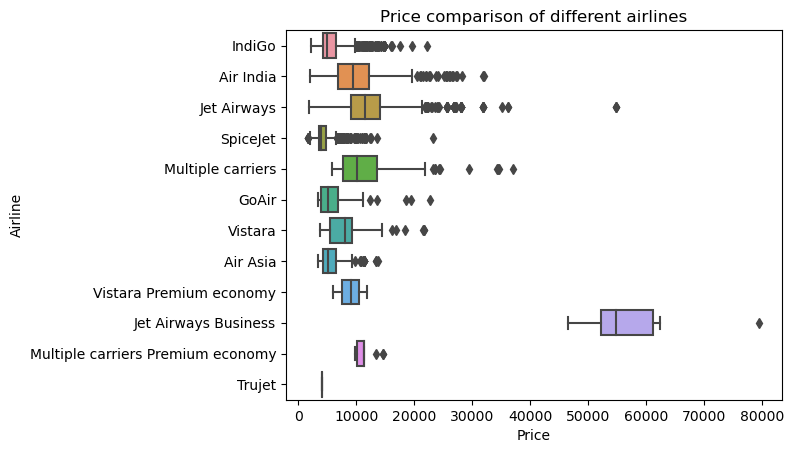

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(25,8))
sns.boxplot(data=df_flight, x= 'Price', y='Airline')
plt.title('Price comparison of different airlines')
plt.show()

# Question 5 : Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

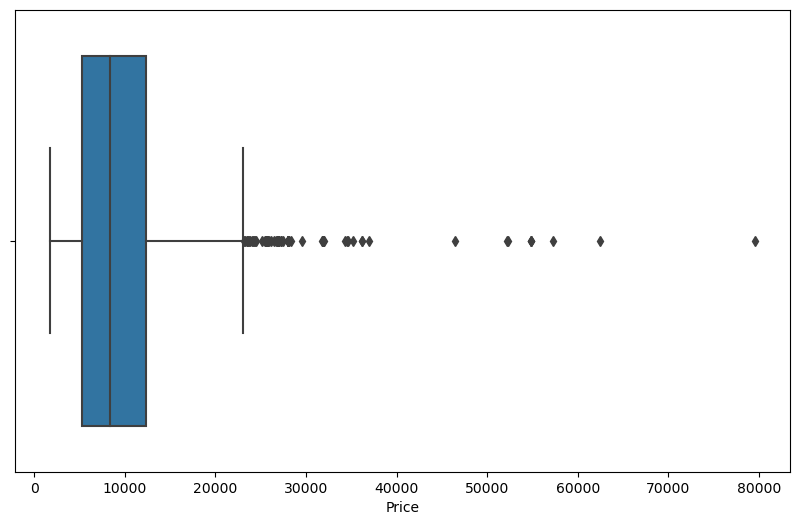

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_flight,x='Price')
plt.show()

In [26]:
df_flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [27]:
import numpy as np
from scipy.stats import iqr
# Calculate Q1, Q3 and IQR
Q1,Q3 = np.percentile(df_flight['Price'], [25, 75])
#IQR = iqr(df_flight['Price'])
iqr = Q3-Q1
IQR_dict = {'Q1': Q1,
            'Q3': Q3,
            'IQR':iqr}
IQR_dict


{'Q1': 5277.0, 'Q3': 12373.0, 'IQR': 7096.0}

In [28]:
Lower_outliers = Q1-1.5*iqr
                            
Upper_outliers= Q3+1.5*iqr

print(f'Lower Outliers :{Lower_outliers}')
print(f'Upper Outliers :{Upper_outliers}')

Lower Outliers :-5367.0
Upper Outliers :23017.0


In [29]:
df_flight[df_flight.Price > Upper_outliers]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


#### 94 Outliers record found

# Question 6 : You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?


In [30]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [31]:
df_flight.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [32]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Feature Engineering

In [40]:
df_flight['Date_of_Journey']=pd.to_datetime(df_flight['Date_of_Journey'],infer_datetime_format=True)

In [41]:
## Splitting Date, Month and Year
df_flight['Date'] = df_flight['Date_of_Journey'].dt.day
df_flight['Month'] = df_flight['Date_of_Journey'].dt.month
df_flight['Year'] = df_flight['Date_of_Journey'].dt.year
df_flight['Day'] = df_flight['Date_of_Journey'].dt.day_name()


In [42]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Date             10683 non-null  int64         
 12  Month            10683 non-null  int64         
 13  Year             10683 non-null  int64         
 14  Day              10683 non-null  objec

In [48]:
df_flight.groupby(by='Month').mean(numeric_only=True)['Price'].sort_values()

Month
4      5230.860849
3      8433.839891
12     9110.774295
6      9214.964905
5      9361.077628
9      9551.474395
1     10492.642791
Name: Price, dtype: float64

<Axes: xlabel='Month'>

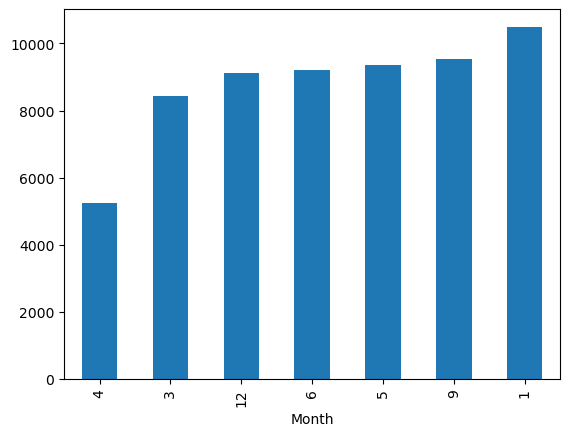

In [50]:
df_flight.groupby(by='Month').mean(numeric_only=True)['Price'].sort_values().plot(kind='bar')

## Jan month has highest average of sales of tickets

In [51]:
df_flight.groupby(by='Month').sum(numeric_only=True)['Price'].sort_values()

Month
4      2217885
12     8719011
1     11279591
9     13429373
3     18647220
5     19414875
6     23369151
Name: Price, dtype: int64

<Axes: xlabel='Month'>

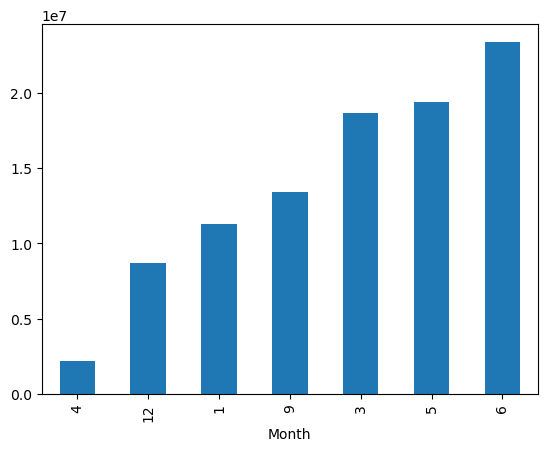

In [53]:
df_flight.groupby(by='Month').sum(numeric_only=True)['Price'].sort_values().plot(kind='bar')

## June month has highest sales of tickets

<Axes: xlabel='Month'>

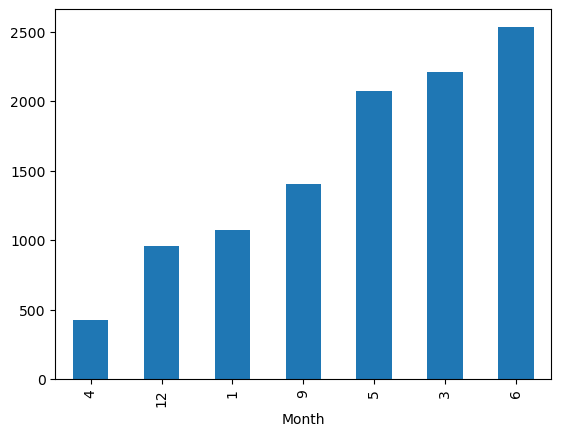

In [54]:
df_flight.groupby(by='Month').count()['Price'].sort_values().plot(kind='bar')

## June month also has highest number of flights

<Axes: xlabel='Month,Day'>

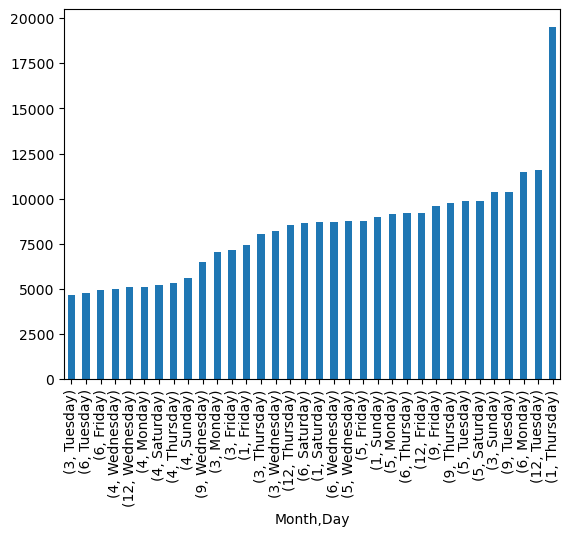

In [56]:
df_flight.groupby(['Month','Day']).mean(numeric_only=True)['Price'].sort_values().plot(kind='bar')


In [57]:
## Drop Date of Journey column
df_flight.drop('Date_of_Journey', axis=1, inplace=True)

In [58]:
df_flight['Arrival_Time'] = df_flight['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [59]:
df_flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,Saturday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,6,9,2019,Friday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019,Thursday
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019,Thursday


In [60]:
df_flight['Arrival_hour']=df_flight['Arrival_Time'].str.split(':').str[0]
df_flight['Arrival_min']=df_flight['Arrival_Time'].str.split(':').str[1]

In [61]:
df_flight.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,Sunday,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,Saturday,13,15


In [62]:
## Converting Arrival  Hour and min to int
df_flight['Arrival_hour']=df_flight['Arrival_hour'].astype(int)
df_flight['Arrival_min']=df_flight['Arrival_min'].astype(int)

In [63]:
df_flight.drop('Arrival_Time', axis=1, inplace=True)

In [64]:
## Splitting Departure Time to Hr and time
df_flight['Departure_hour']=df_flight['Dep_Time'].str.split(':').str[0]
df_flight['Departure_min']=df_flight['Dep_Time'].str.split(':').str[1]

In [65]:
## Converting Departure Hour and min to int
df_flight['Departure_hour']=df_flight['Departure_hour'].astype(int)
df_flight['Departure_min']=df_flight['Departure_min'].astype(int)

In [66]:
df_flight.drop('Dep_Time',axis=1,inplace=True)

# Question 7 : You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


### Analyzing features like Date of journey and flight prices that could help the booking agent to optimize their pricing stratgies.

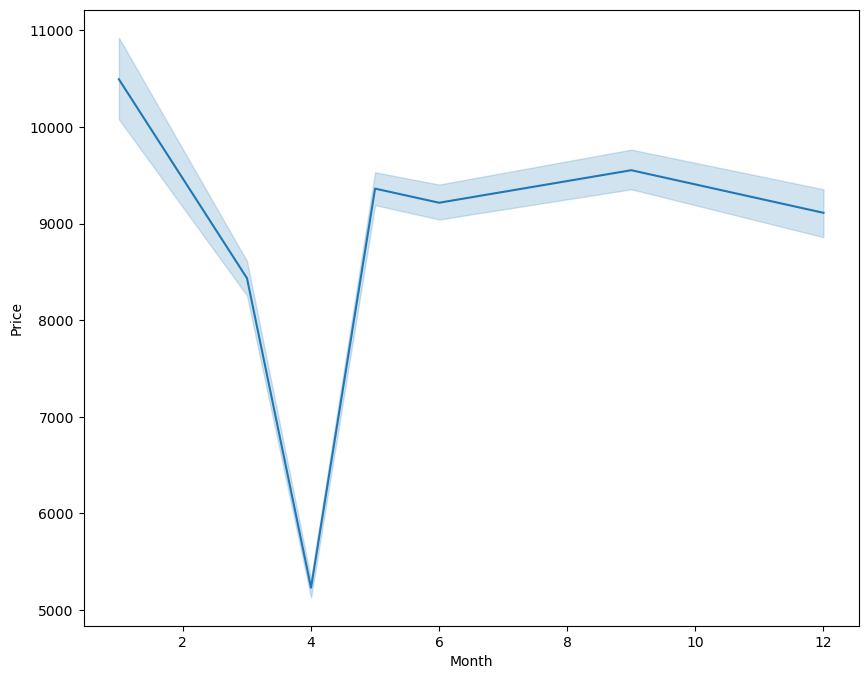

In [68]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(data=df_flight, x='Month', y ='Price')
plt.show()

### January has the highest price while April as the cheapest

<Axes: xlabel='Month'>

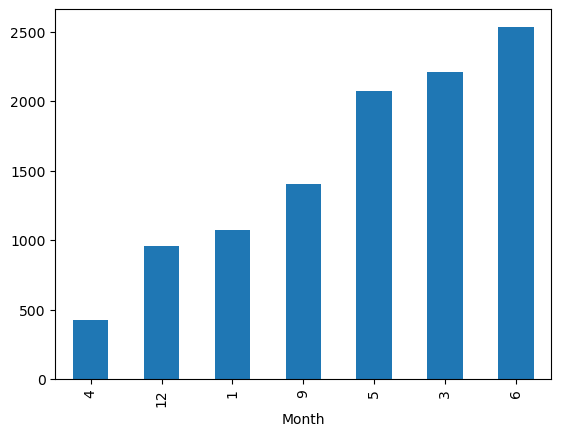

In [72]:
df_flight.groupby(['Month']).count()['Price'].sort_values().plot(kind='bar')


### Also April has the least no. of flights while June as maximum no. of flights

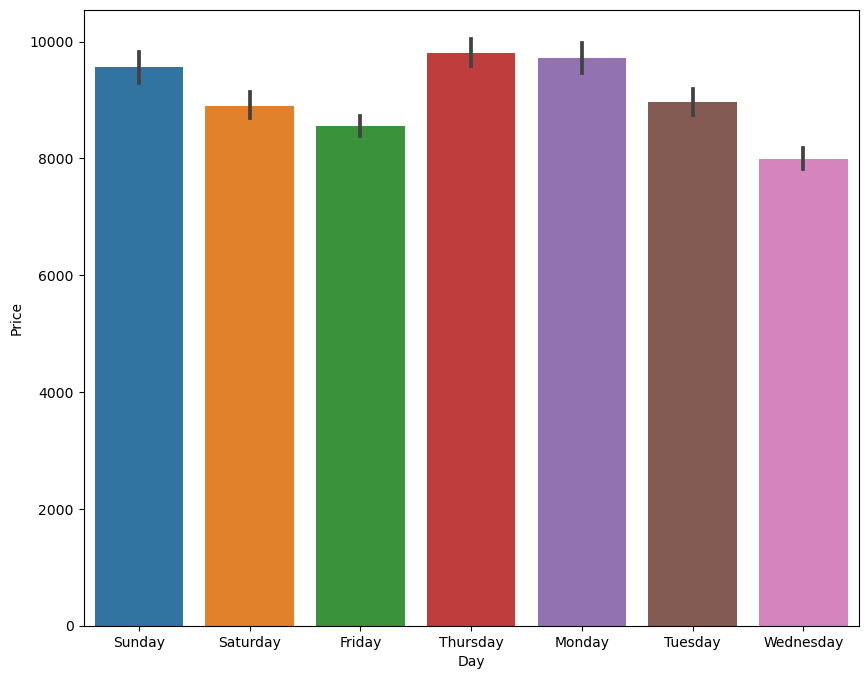

In [73]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(data=df_flight, x='Day', y ='Price')
plt.show()

In [75]:
df_flight.groupby(by='Airline').mean(numeric_only=True)['Price'].sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3576\2838580119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flight.groupby(by='Airline').mean()['Price'].sort_values().plot(kind='bar')


<Axes: xlabel='Airline'>

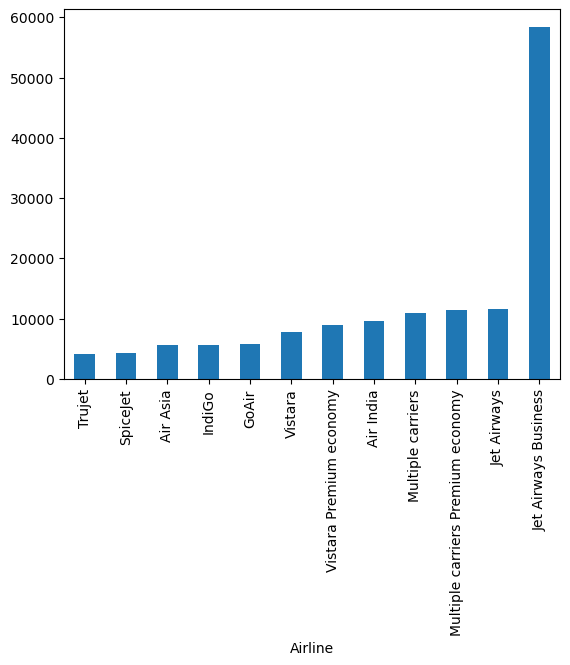

In [76]:
df_flight.groupby(by='Airline').mean()['Price'].sort_values().plot(kind='bar')

### Trujet is the cheapest and jet Airways is costliest airline

<Axes: >

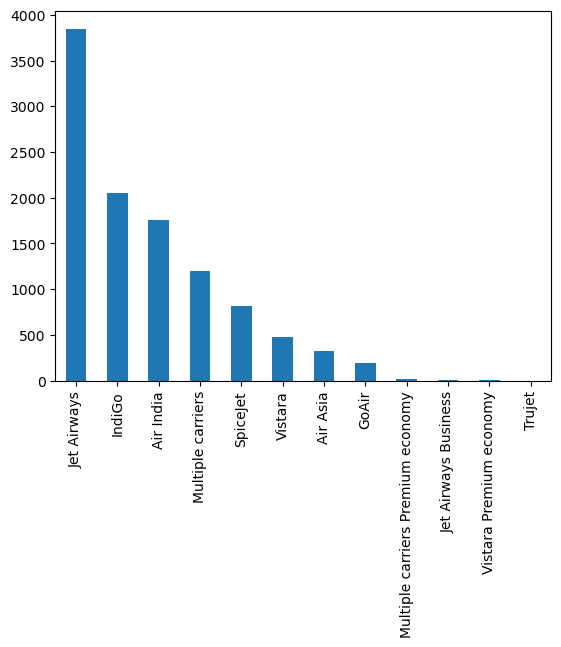

In [77]:
df_flight['Airline'].value_counts().plot(kind='bar')


# Question 8 : You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Time-related features: These would include date of booking, date of travel, and time of day of travel. By analyzing these features, we can identify whether flight prices tend to be higher or lower during certain times of the year, or certain times of the day.

Route-related features: These would include the origin and destination cities of the flights, as well as any stopovers or layovers. By analyzing these features, we can identify whether flight prices tend to be higher or lower for certain routes, or for flights with specific stopover locations.

Airline-related features: These would include the airline carrier for each flight. By analyzing these features, we can identify whether certain airlines tend to have higher or lower prices than others.

Demand-related features: These would include the number of passengers booked on a flight, as well as the number of seats available. By analyzing these features, we can identify whether flight prices tend to be higher or lower when demand is high or low.

Other factors: There may be other features in the dataset that could affect flight prices, such as the type of aircraft used, the length of the flight, or the class of service

# Question 9 : Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [33]:
import pandas as pd
import numpy as np
df_ps = pd.read_csv('googleplaystore.csv')

In [34]:
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [35]:
df_ps.shape

(10841, 13)

In [36]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [37]:
df_ps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Question 10 : How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.


In [38]:
df_ps['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [39]:
df_ps['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [40]:
df_ps['Reviews'].str.isnumeric().sum()

10840

In [41]:
df_ps[~df_ps['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [42]:
df_copy_ps = df_ps.copy()

In [43]:
df_copy_ps = df_copy_ps.drop(df_copy_ps.index[10472])

In [44]:
df_copy_ps[~df_copy_ps['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [45]:
# Convert Reviews datatype to int

df_copy_ps['Reviews'] = df_copy_ps['Reviews'].astype(int)

In [46]:
df_copy_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [47]:
df_copy_ps.groupby(by='Category').describe()

Rating                                                   \
                      count      mean       std  min    25%  50%    75%  max   
Category                                                                       
ART_AND_DESIGN         62.0  4.358065  0.358297  3.2  4.100  4.4  4.700  5.0   
AUTO_AND_VEHICLES      73.0  4.190411  0.543692  2.1  4.000  4.3  4.600  4.9   
BEAUTY                 42.0  4.278571  0.362603  3.1  4.000  4.3  4.575  4.9   
BOOKS_AND_REFERENCE   178.0  4.346067  0.429046  2.7  4.100  4.5  4.600  5.0   
BUSINESS              303.0  4.121452  0.624422  1.0  3.900  4.3  4.500  5.0   
COMICS                 58.0  4.155172  0.537758  2.8  3.825  4.4  4.500  5.0   
COMMUNICATION         328.0  4.158537  0.426192  1.0  4.000  4.3  4.400  5.0   
DATING                195.0  3.970769  0.630510  1.0  3.700  4.1  4.400  5.0   
EDUCATION             155.0  4.389032  0.251894  3.5  4.200  4.4  4.600  4.9   
ENTERTAINMENT         149.0  4.126174  0.302556  3.0  3.900  4.2  4.300  4.7   
EVENTS                 45.0  4.435556  0.419499  2.9  4.200  4.5  4.700  5.0   
FAMILY               1747.0  4.192272  0.508026  1.0  4.000  4.3  4.500  5.0   
FINANCE               323.0  4.131889  0.642108  1.0  4.000  4.3  4.500  5.0   
FOOD_AND_DRINK        109.0  4.166972  0.548070  1.7  4.000  4.3  4.500  5.0   
GAME                 1097.0  4.286326  0.365375  1.0  4.100  4.4  4.500  5.0   
HEALTH_AND_FITNESS    297.0  4.277104  0.617822  1.4  4.100  4.5  4.600  5.0   
HOUSE_AND_HOME         76.0  4.197368  0.368411  2.8  4.000  4.3  4.500  4.8   
LIBRARIES_AND_DEMO     65.0  4.178462  0.378522  3.1  4.000  4.2  4.400  5.0   
LIFESTYLE             314.0  4.094904  0.693907  1.5  3.800  4.2  4.600  5.0   
MAPS_AND_NAVIGATION   124.0  4.051613  0.519926  1.9  3.775  4.2  4.400  4.9   
MEDICAL               350.0  4.189143  0.663581  1.0  4.000  4.3  4.600  5.0   
NEWS_AND_MAGAZINES    233.0  4.132189  0.536707  1.7  3.900  4.2  4.500  5.0   
PARENTING              50.0  4.300000  0.517845  2.0  4.100  4.4  4.675  5.0   
PERSONALIZATION       314.0  4.335987  0.352732  2.5  4.200  4.4  4.600  5.0   
PHOTOGRAPHY           317.0  4.192114  0.462896  2.0  4.000  4.3  4.500  5.0   
PRODUCTIVITY          351.0  4.211396  0.504931  1.0  4.100  4.3  4.500  5.0   
SHOPPING              238.0  4.259664  0.404577  1.6  4.100  4.3  4.500  5.0   
SOCIAL                259.0  4.255598  0.413809  1.9  4.100  4.3  4.500  5.0   
SPORTS                319.0  4.223511  0.427857  1.5  4.100  4.3  4.500  5.0   
TOOLS                 734.0  4.047411  0.616143  1.0  3.800  4.2  4.400  5.0   
TRAVEL_AND_LOCAL      226.0  4.109292  0.504691  2.2  3.900  4.3  4.400  5.0   
VIDEO_PLAYERS         160.0  4.063750  0.551098  1.8  3.800  4.2  4.400  4.9   
WEATHER                75.0  4.244000  0.331353  3.3  4.050  4.3  4.500  4.8   

                    Reviews                                               \
                      count          mean           std    min       25%   
Category                                                                   
ART_AND_DESIGN         65.0  2.637600e+04  6.932801e+04    0.0    136.00   
AUTO_AND_VEHICLES      85.0  1.369019e+04  4.340611e+04    0.0     22.00   
BEAUTY                 53.0  7.476226e+03  1.909467e+04    0.0     36.00   
BOOKS_AND_REFERENCE   231.0  9.506090e+04  3.532053e+05    0.0     10.00   
BUSINESS              460.0  3.033598e+04  1.418051e+05    0.0      2.00   
COMICS                 60.0  5.638793e+04  1.958715e+05    1.0    288.00   
COMMUNICATION         387.0  2.107138e+06  8.189705e+06    0.0     33.00   
DATING                234.0  3.115931e+04  8.238692e+04    0.0     21.50   
EDUCATION             156.0  2.538191e+05  9.997874e+05   11.0   3785.00   
ENTERTAINMENT         149.0  3.971688e+05  1.130188e+06  303.0  18523.00   
EVENTS                 64.0  2.515906e+03  6.738434e+03    0.0      5.75   
FAMILY               1972.0  2.080255e+05  1.500559e+06    0.0     31.00   


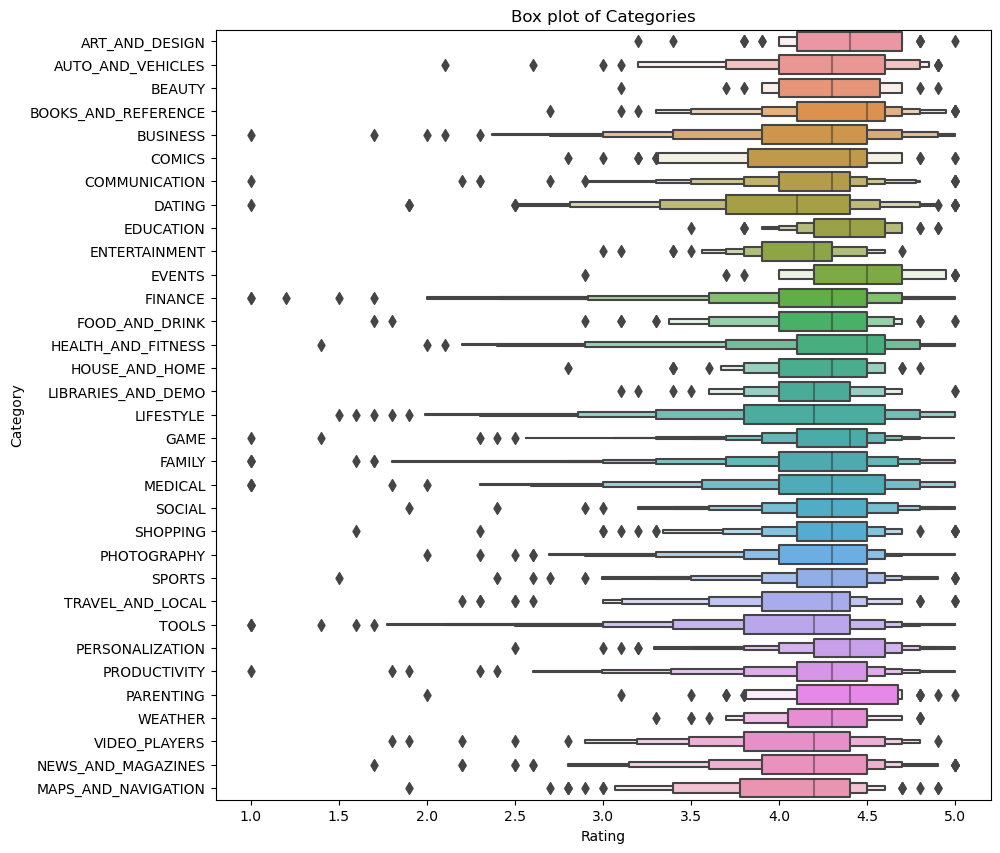

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxenplot(data=df_copy_ps, x='Rating', y='Category')
#plt.xlim([0,5.1])
plt.title('Box plot of Categories')
plt.show()

# Question 11 : Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [49]:
df_copy_ps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

1. 1474 missing values found in Rating
2. 1 Missing Value found in Type
3. 8 Missing Values found in Current Ver
4. 2 Missing Values found in Android Ver


#### If there are missing values in the dataset, it can affect the accuracy of descriptive statistics, correlations, and predictive models. For example, missing values in the rating column of the Google Playstore dataset may cause the mean rating to be skewed. 

#### Therefore, it is essential to identify missing values in a dataset and develop a strategy for handling them. Some common strategies for handling missing values include removing the rows with missing values, imputing missing values with the mean or median of the column, or using machine learning algorithms that can handle missing values.

# Question 12 : What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship

In [50]:
# Handling Size variable in the dataset

df_copy_ps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [52]:
# replacing all values in thousand

df_copy_ps['Size']=df_copy_ps['Size'].str.replace('M','000')
df_copy_ps['Size']=df_copy_ps['Size'].str.replace('k','')
df_copy_ps['Size']=df_copy_ps['Size'].replace('Varies with device',np.nan)
df_copy_ps['Size']=df_copy_ps['Size'].astype(float)

In [53]:
df_copy_ps['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

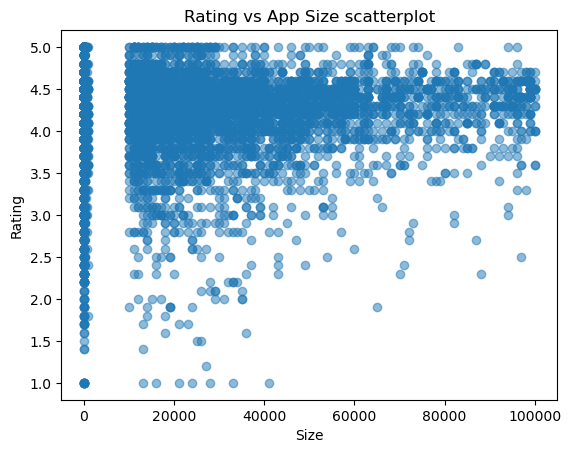

In [54]:
import matplotlib.pyplot as plt
plt.scatter(x=df_copy_ps['Size'],y=df_copy_ps['Rating'], alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Rating vs App Size scatterplot')
plt.show()


In [55]:
df_copy_ps.corr()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3824\2634240413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy_ps.corr()


,Rating,Reviews,Size
Rating,1.000000,0.068141,0.082134
Reviews,0.068141,1.000000,0.233791
Size,0.082134,0.233791,1.000000


### There is no relation between ratings and size as correlation is 0 and scatter plot also shows the same

# Question 13 : How does the type of app affect its price? Create a bar chart to compare average prices by app type.


In [57]:
df_copy_ps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [58]:
df_copy_ps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [60]:
# Cleaning Price and Install column
char_to_remove= ['+', ',', '$']
columns_to_clean = ['Installs', 'Price']
for items in char_to_remove:
    for col in columns_to_clean:
        df_copy_ps[col] = df_copy_ps[col].str.replace(items,'')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3824\1548087062.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy_ps[col] = df_copy_ps[col].str.replace(items,'')


In [61]:
df_copy_ps['Price']=df_copy_ps['Price'].astype(float)

In [64]:
df_copy_ps.groupby(by='Type').mean(numeric_only=True)['Price']

Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

<Axes: title={'center': 'Barchart of app Type vs Average Price'}, xlabel='Type'>

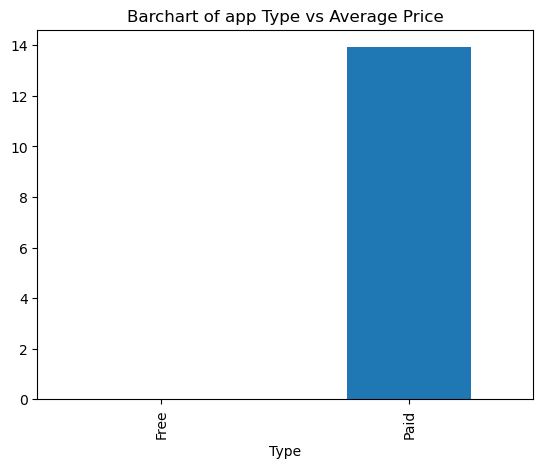

In [66]:
df_copy_ps.groupby(by='Type').mean(numeric_only=True)['Price'].plot(kind='bar',title='Barchart of app Type vs Average Price')

### Free apps have 0 average price
### Paid apps have 13.92 average price



# Question 14 : What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [69]:
df_copy_ps.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [70]:
df_copy_ps['App'].duplicated().sum()

1181

In [75]:
df_copy_ps['Installs']=df_copy_ps['Installs'].astype(int)

In [76]:
df_app_installs = df_copy_ps.groupby(['App'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_app_installs.Installs = df_app_installs.Installs/1000000000

Text(0.5, 1.0, 'Most Popular Apps in Play Store')

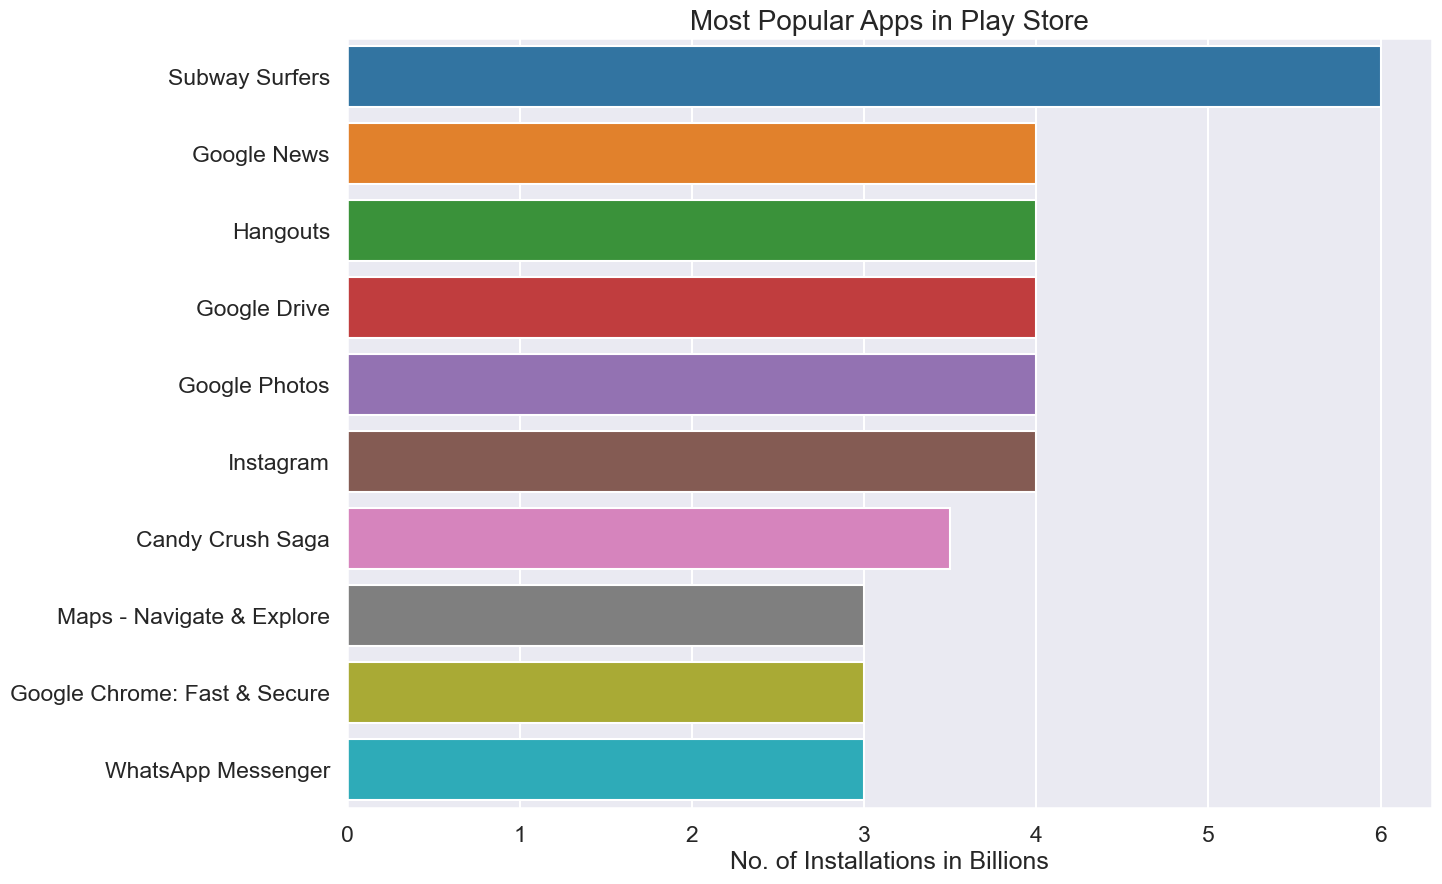

In [78]:
df2 = df_app_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'App' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Apps in Play Store", size = 20)

In [81]:
dfa = df_copy_ps.groupby(['App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)

In [82]:
dfa.head(10)

,App,Installs
8079,Subway Surfers,6000000000
4933,Google News,4000000000
5118,Hangouts,4000000000
4924,Google Drive,4000000000
4937,Google Photos,4000000000
5399,Instagram,4000000000
2364,Candy Crush Saga,3500000000
6050,Maps - Navigate & Explore,3000000000
4921,Google Chrome: Fast & Secure,3000000000
9041,WhatsApp Messenger,3000000000


# Question 15 : A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

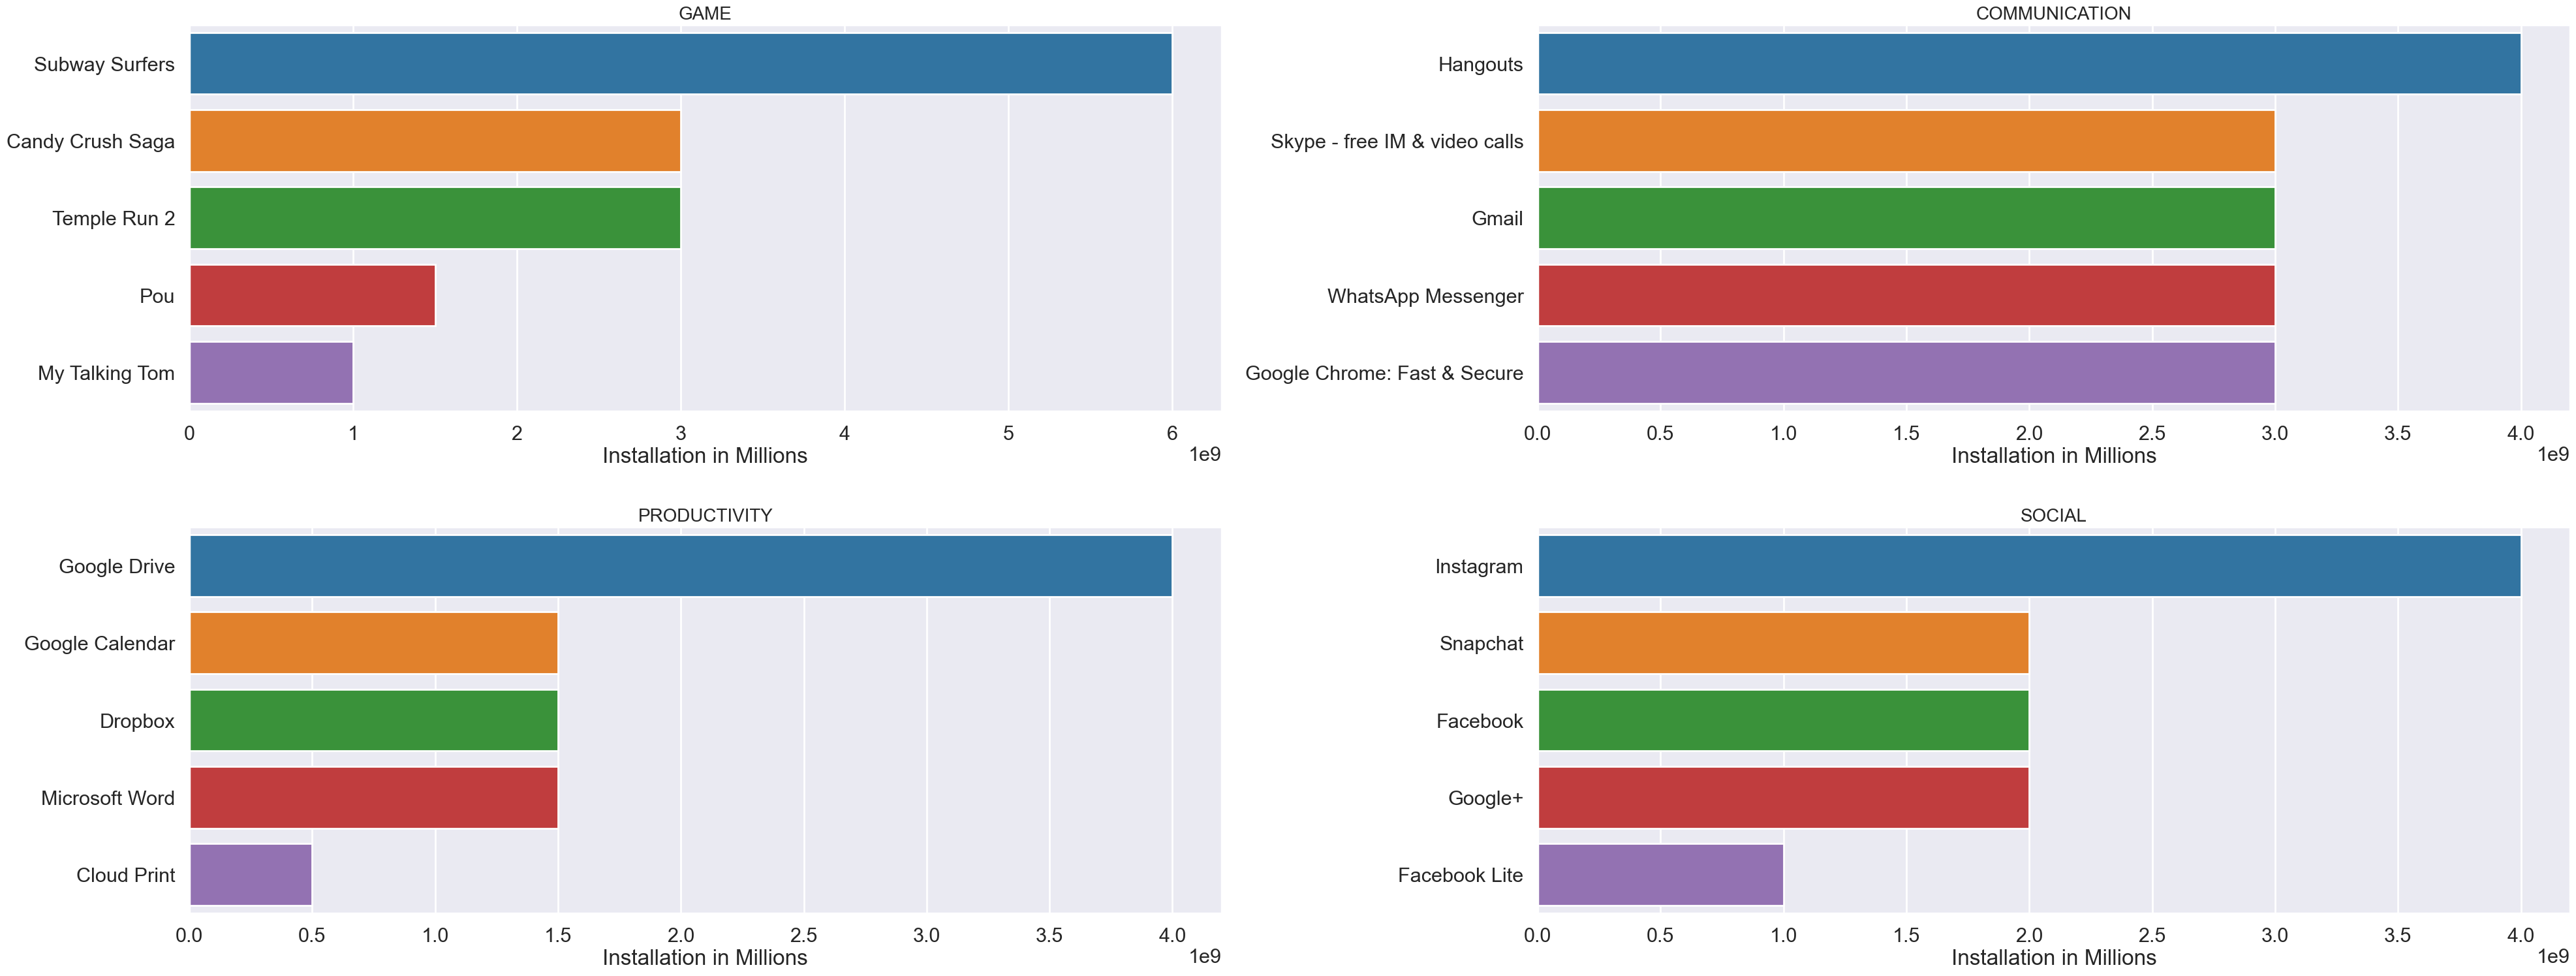

In [83]:
dfa = df_copy_ps.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Top 4 app Categories with highest installs are : Game, Communication ,productivity and socials


# Question 16 : A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Play Store, we would need to analyze various features such as:
Number of downloads: This would indicate how popular an app is among users.

Rating: A higher rating indicates that users are satisfied with the app.

Reviews: The number of reviews and the sentiment of those reviews could provide insights into user satisfaction and potential areas for improvement.

Category: Analyzing the categories in which the apps are listed could help identify the most successful app developers in a specific category.

Price: The price of the app could provide insights into the developer's pricing strategy.

App size: The size of the app could impact its popularity and the user experience.



In [84]:
df_copy_ps.sort_values(by=['Installs','Rating'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,NaN,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


In [85]:
df_copy_ps.corr()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3824\2634240413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy_ps.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.082134,0.051355,-0.021903
Reviews,0.068141,1.000000,0.233791,0.643122,-0.009667
Size,0.082134,0.233791,1.000000,0.164608,-0.022772
Installs,0.051355,0.643122,0.164608,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.022772,-0.011689,1.000000


In [87]:
df_copy_ps.groupby(by=['Category','Installs']).mean(numeric_only=True)['Rating']


Category        Installs
ART_AND_DESIGN  0                NaN
                100         5.000000
                1000        4.366667
                5000        4.375000
                10000       4.445455
                              ...   
WEATHER         500000      4.428571
                1000000     4.233333
                5000000     4.112500
                10000000    4.327273
                50000000    4.420000
Name: Rating, Length: 514, dtype: float64

<Axes: title={'center': 'Genres vs Average Rating'}, xlabel='Genres'>

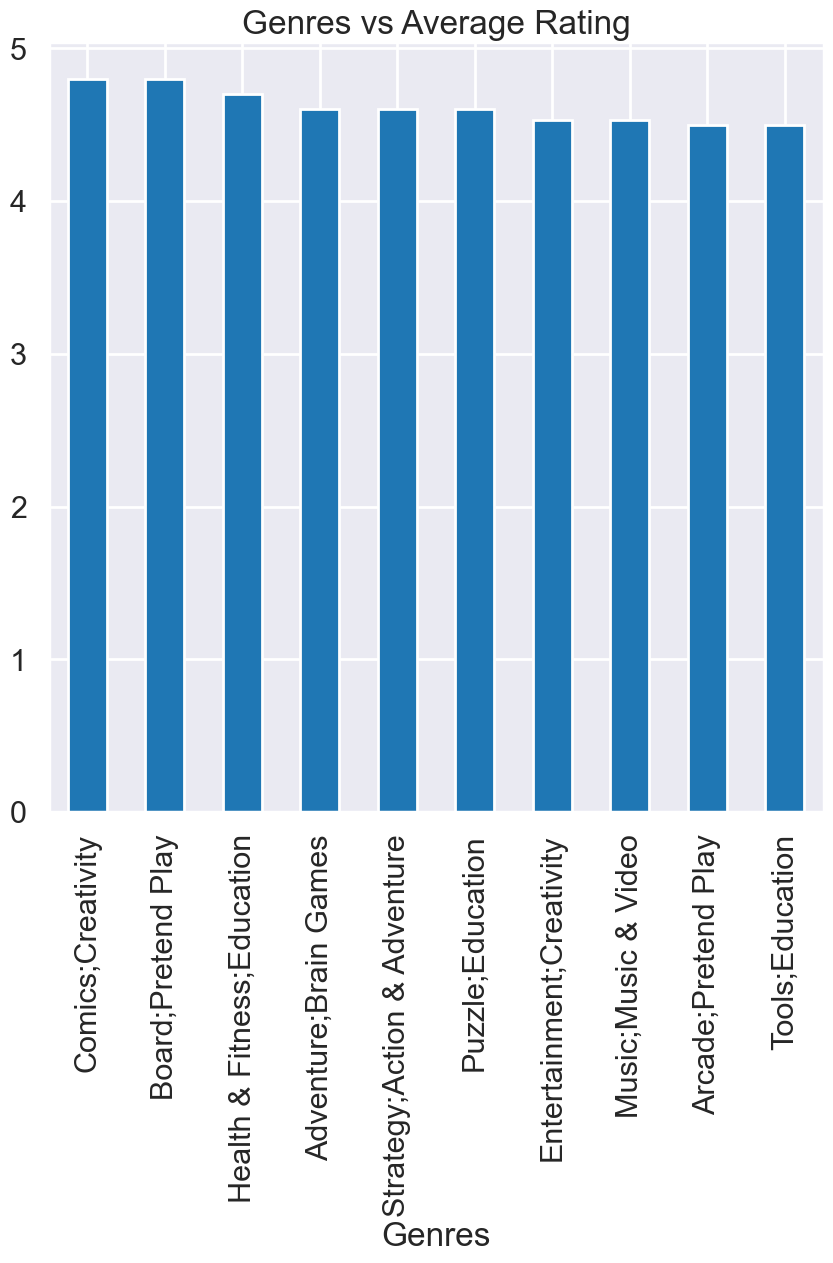

In [89]:
df_copy_ps.groupby(by='Genres').mean(numeric_only=True)['Rating'].sort_values(ascending=False)[0:10].plot(kind='bar',
                                                                                      figsize=(10,10),
                                                                                      title='Genres vs Average Rating')


<Axes: xlabel='Type'>

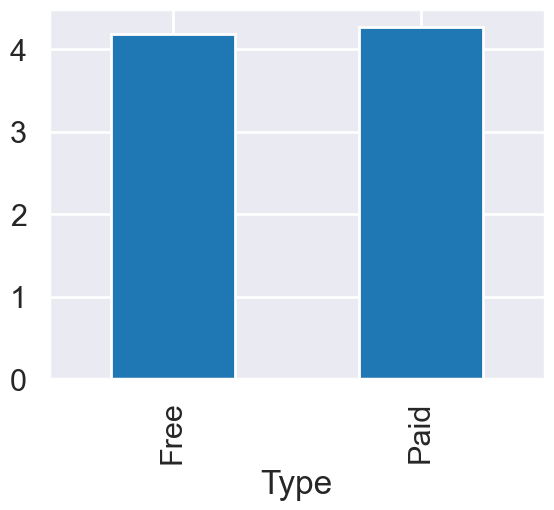

In [91]:
df_copy_ps.groupby(by='Type').mean(numeric_only=True)['Rating']
df_copy_ps.groupby(by='Type').mean(numeric_only=True)['Rating'].plot(kind='bar')

In [93]:
df_copy_ps.groupby(by='Type').sum(numeric_only=True)['Installs']


Type
Free    167560477406
Paid        72956081
Name: Installs, dtype: int64

1. Top 3 apps with highest Installs and Ratings are : Subway Surfers, Instagram and Google Photos
2. Top 3 Genres with highest Average Rating are : Comics , Board, Health and fitness
3. Paid apps have slightly better average Rating
4. Free apps are installed a lot when compared to Paid apps.

# Queston 17 : A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app, we would need to analyze various features such as:

   Seasonality: Certain categories of apps may perform better during specific seasons (e.g., fitness apps during the new year or travel apps during the summer).

Monthly trends: Analyzing the number of downloads, rating, and reviews over time could help identify trends in user behavior and preferences.

Day of the week: The day of the week may impact app usage and downloads. For example, weekdays may see higher usage for productivity apps, while weekends may see higher usage for gaming apps.

Competition: Analyzing the number of apps in a particular category and their performance could provide insights into the level of competition in the market.

User demographics: Understanding the demographics of the app's target audience could help identify the best time to launch the app based on their behavior and preferences.



In [95]:
df_copy_ps['Last Updated']= pd.to_datetime(df_copy_ps['Last Updated'])
df_copy_ps['day'] = df_copy_ps['Last Updated'].dt.day
df_copy_ps['month'] = df_copy_ps['Last Updated'].dt.month
df_copy_ps['year'] = df_copy_ps['Last Updated'].dt.year
df_copy_ps['day_name'] = df_copy_ps['Last Updated'].dt.day_name()
df_copy_ps.groupby(by='month').mean()['Rating']


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3824\3541648786.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy_ps.groupby(by='month').mean()['Rating']


month
1     4.142892
2     4.096209
3     4.114000
4     4.154600
5     4.161031
6     4.184372
7     4.250141
8     4.293108
9     4.042636
10    4.016460
11    4.112298
12    4.071006
Name: Rating, dtype: float64

<Axes: xlabel='month'>

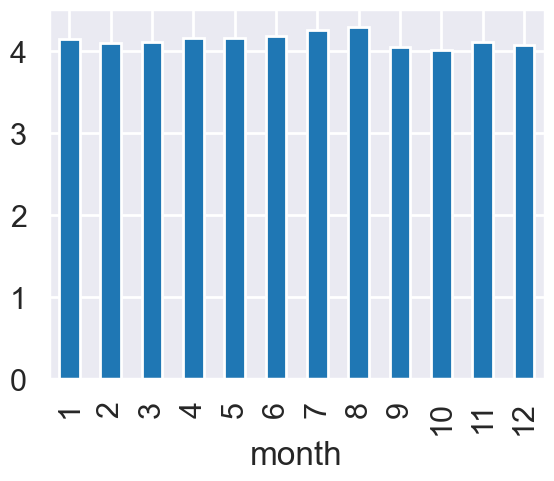

In [96]:
df_copy_ps.groupby(by='month').mean(numeric_only=True)['Rating'].plot(kind='bar')

In [97]:
df_copy_ps.groupby(by='month').sum()['Installs'].sort_values(ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3824\1515929538.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_copy_ps.groupby(by='month').sum()['Installs'].sort_values(ascending=False)


month
7     74442911579
8     68668379529
6      8186207674
5      6232315327
4      2893864919
11     1618368297
1      1186499286
3      1186028825
12     1150350147
2      1017961455
10      590374124
9       460172325
Name: Installs, dtype: int64

<Axes: xlabel='month'>

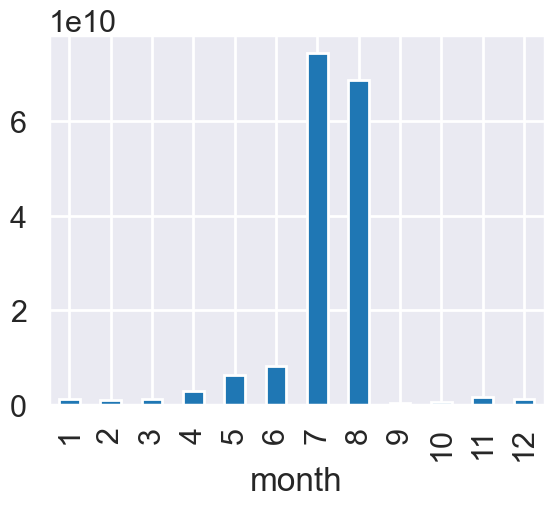

In [98]:
df_copy_ps.groupby(by='month').sum(numeric_only=True)['Installs'].plot(kind='bar')
